In [6]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature
import utils
import blend

img_list = utils.load_images('../input_image/parrington')
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

blended_image = cylinder_img_list[0].copy()
img = cylinder_img_list[1].copy()

print('Find corner response 1')
corner_response1 = feature.harris_corner(blended_image)
descriptors1, position1 = feature.extract_description(blended_image, corner_response1, kernel=5)

print('Find corner response 2')
corner_response2 = feature.harris_corner(img)
descriptors2, position2 = feature.extract_description(img, corner_response2, kernel=5)

print('Feature matching')
mp = feature.matching(descriptors1, descriptors2, position1, position2)

print('Find best shift using RANSAC')
shift = blend.RANSAC(mp)



Find corner response 1
Find corner response 2
Feature matching
Find best shift using RANSAC


In [104]:
# img should bigger than img2
def blending(img1, img2, shift):
    padding = [
        (shift[0] if shift[0] > 0 else 0, -shift[0] if shift[0] < 0 else 0),
        (shift[1] if shift[1] > 0 else 0, -shift[1] if shift[1] < 0 else 0),
        (0, 0)
    ]
    shifted_img1 = np.lib.pad(img1, padding, 'constant', constant_values=0)
    
    h1, w1, _ = shifted_img.shape
    h2, w2, _ = img2.shape
    
    inv_shift = [h1-h2, w1-w2]
    inv_padding = [
        (-inv_shift[0] if shift[0] < 0 else 0, inv_shift[0] if shift[0] > 0 else 0),
        (-inv_shift[1] if shift[1] < 0 else 0, inv_shift[1] if shift[1] > 0 else 0),
        (0, 0)
    ]
    shifted_img2 = np.lib.pad(img2, inv_padding, 'constant', constant_values=0)
    
    print(shifted_img.shape, img2.shape)
    print(padding)
    print(inv_shift)
    print(inv_padding)

#    plt.imshow(shifted_img)
#    plt.show()
#    plt.imshow(shifted_img2)
#    plt.show()

    for y in range(h1):
        for x in range(w1):
            color1 = shifted_img1[y][x]
            color2 = shifted_img2[y][x]
            
            if list(color1) == [0, 0, 0]:
                shifted_img1[y][x] = color2
            elif list(color2) == [0, 0, 0]:
                shifted_img1[y][x] = shifted_img1[y][x]
            else:
                ratio = x/w1
                if ((color1 - color2)**2).sum() > 10**2:
                    ratio = 1
                shifted_img1[y][x] = (1-ratio)*color1 + ratio*color2
      
    return shifted_img1

(516, 621, 3) (512, 375, 3)
[(4, 0), (246, 0), (0, 0)]
[4, 246]
[(0, 4), (0, 246), (0, 0)]


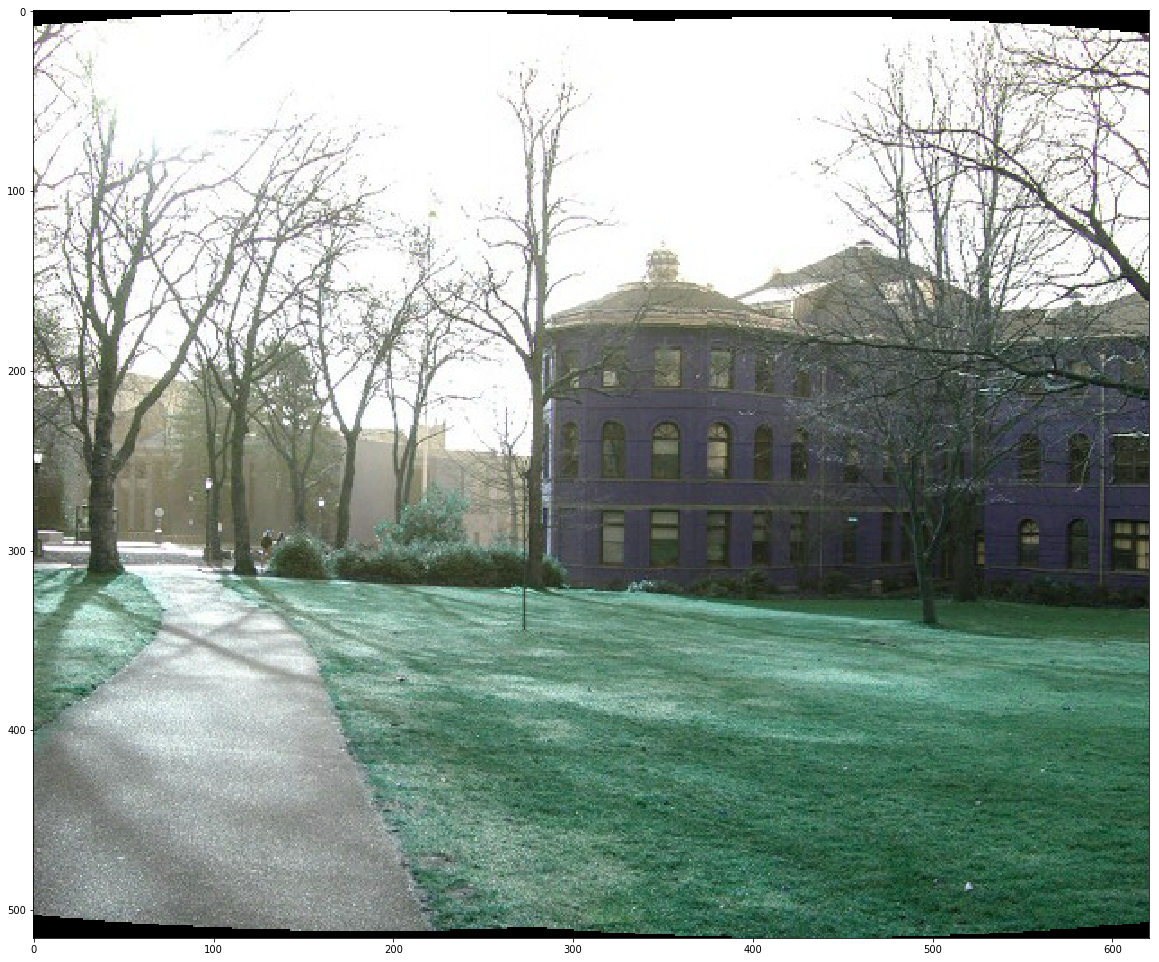

In [105]:
iii = blending(blended_image, img, shift)

plt.figure(figsize=(20,20))
plt.imshow(iii)
plt.show()